### 한솥의 베스트 셀러 수집하기
- 한솥 베스트 셀러 페이지 정보 요청
- 한번씩 상세 페이지 들어 갔다가 나오면서 (이전페이지) 메뉴명, 가격, 상세정보 수집하기

In [10]:
import pandas as pd
import time # 실행에 대한 딜레이를 주기 위한 라이브럴리
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

### 1번재 메뉴 상세 페이지 들어가서 수집 후 이전 ㅍㅔ이지로 이동

In [23]:
# 한솥 베스트 셀러 페이지 요청
url ='https://www.hsd.co.kr/menu/menu_keyword?keyword=1'

driver = wb.Chrome()
driver.get(url)

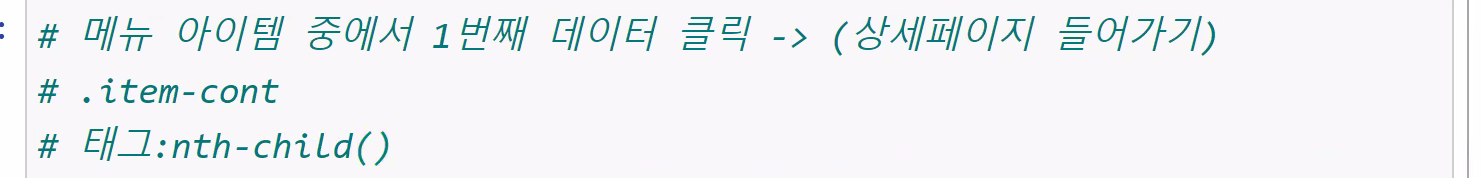m

In [38]:
#메뉴 아이템 중에서 1번째 데이터 클릭-> (상세페이지 들어가기).nth-child(1)
item = driver.find_element(By.CSS_SELECTOR, value= ".menu_cont>li:nth-child(2)")


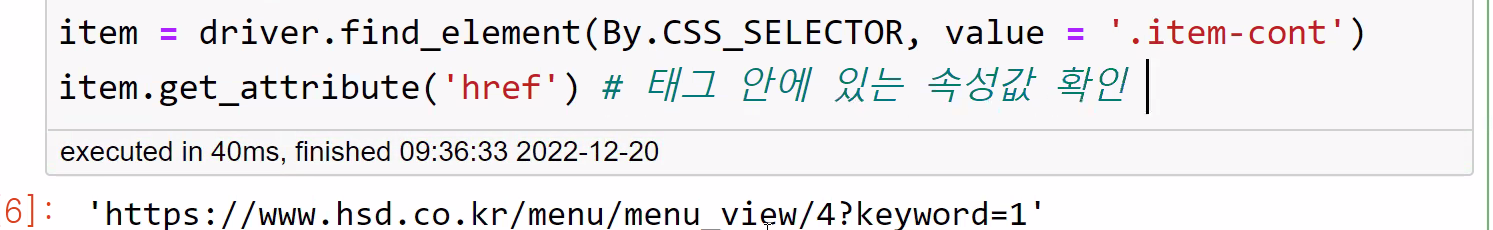

In [42]:
item.get_attribute('href')



StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=108.0.5359.125)
Stacktrace:
Backtrace:
	(No symbol) [0x0069F243]
	(No symbol) [0x00627FD1]
	(No symbol) [0x0051D04D]
	(No symbol) [0x0051FD34]
	(No symbol) [0x0051FBE5]
	(No symbol) [0x00520565]
	(No symbol) [0x0057D47C]
	(No symbol) [0x0056858C]
	(No symbol) [0x0057C9EB]
	(No symbol) [0x00568386]
	(No symbol) [0x0054163C]
	(No symbol) [0x0054269D]
	GetHandleVerifier [0x00939A22+2655074]
	GetHandleVerifier [0x0092CA24+2601828]
	GetHandleVerifier [0x00748C0A+619850]
	GetHandleVerifier [0x00747830+614768]
	(No symbol) [0x006305FC]
	(No symbol) [0x00635968]
	(No symbol) [0x00635A55]
	(No symbol) [0x0064051B]
	BaseThreadInitThunk [0x760500F9+25]
	RtlGetAppContainerNamedObjectPath [0x77487BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77487B8E+238]


In [43]:
item.click() # 상세페이지 들어감
time.sleep(1.5)
driver.back()

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=108.0.5359.125)
Stacktrace:
Backtrace:
	(No symbol) [0x0069F243]
	(No symbol) [0x00627FD1]
	(No symbol) [0x0051D04D]
	(No symbol) [0x0051FD34]
	(No symbol) [0x0051FBE5]
	(No symbol) [0x0051FE80]
	(No symbol) [0x0054DA74]
	(No symbol) [0x0054311D]
	(No symbol) [0x0056858C]
	(No symbol) [0x00542BFF]
	(No symbol) [0x00568804]
	(No symbol) [0x0057C9EB]
	(No symbol) [0x00568386]
	(No symbol) [0x0054163C]
	(No symbol) [0x0054269D]
	GetHandleVerifier [0x00939A22+2655074]
	GetHandleVerifier [0x0092CA24+2601828]
	GetHandleVerifier [0x00748C0A+619850]
	GetHandleVerifier [0x00747830+614768]
	(No symbol) [0x006305FC]
	(No symbol) [0x00635968]
	(No symbol) [0x00635A55]
	(No symbol) [0x0064051B]
	BaseThreadInitThunk [0x760500F9+25]
	RtlGetAppContainerNamedObjectPath [0x77487BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77487B8E+238]


In [ ]:
item = driver.find_element(By.CSS_SELECTOR, value= ".menu_cont>li:nth-child(2)")
item.click() # 상세페이지 들어감

# 메뉴 정보들 추출 -> 출력
cat =driver.find_element(By.CSS_SELECTOR, value= ".he_tit>.dp1").text
name = driver.find_element(By.CSS_SELECTOR, value= ".he_tit>.dp2").text
price = driver.find_element(By.CSS_SELECTOR, value= "#total_price").text
cont = driver.find_element(By.CSS_SELECTOR, value= ".account").text

time.sleep(1.5)
driver.back()

print(f'{cat}\n {name}\n {price}원\n {cont}')

### 베스트 셀러 모든 메뉴 상세페이지 들어가서 수집하기
- 반복을 몇번해야될지 찾아내기(li의 개수만큼)
- 첫번째 메뉴 상세페이지 들어갔다가 나와서 두번째 메뉴 클릭
- 위의 과정을 마지막 메뉴까지 진행하기

In [72]:
#반복을 몇번해야될지 찾아내기(li의 개수 만큼)

data_range = driver.find_elements(By.CSS_SELECTOR, value= ".menu_cont>li")#li가 몇개인가?

print(len(data_range))

11


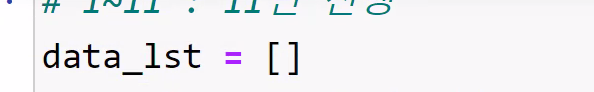
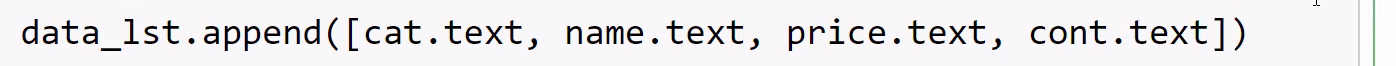
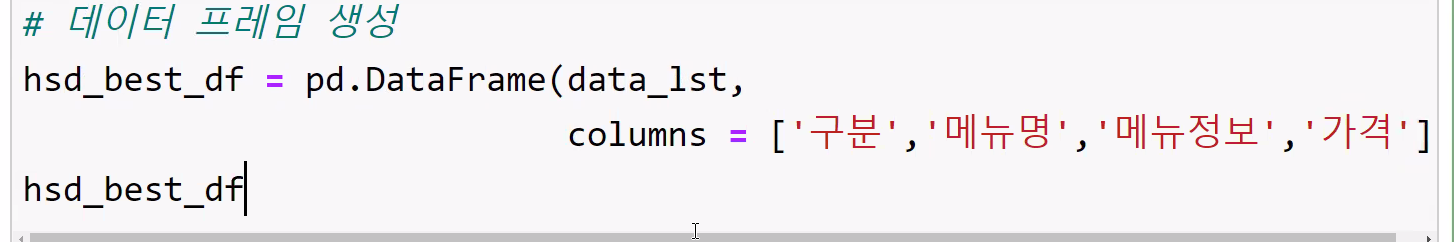

In [76]:
cat_lst = []
name_lst = []
price_lst = []
cont_lst = []
for i in range(1,len(data_range) + 1):
    item = driver.find_element(By.CSS_SELECTOR, value= f".menu_cont>li:nth-child({i})")
    item.click()
    
    cat =driver.find_element(By.CSS_SELECTOR, value= ".he_tit>.dp1").text
    name = driver.find_element(By.CSS_SELECTOR, value= ".he_tit>.dp2").text
    price = driver.find_element(By.CSS_SELECTOR, value= "#total_price").text
    cont = driver.find_element(By.CSS_SELECTOR, value= ".account").text
    
    time.sleep(1.5)
    driver.back()
    
    cat_lst.append(cat) 
    name_lst.append(name)
    price_lst.append(price)
    cont_lst.append(cont)
    
    
print(len(cat_lst))   
driver.close()

11


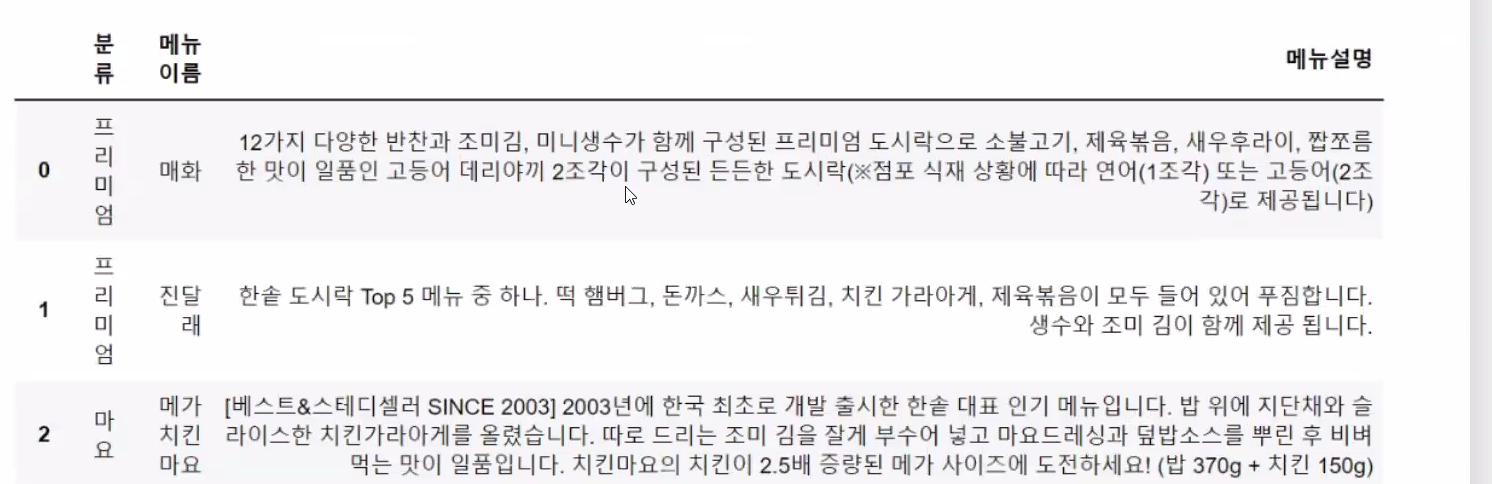

In [77]:
pd.set_option('display.max_colwidth', None)

In [80]:
menu = pd.DataFrame({'분류':cat_lst,'메뉴이름':name_lst,'메뉴설명':cont_lst,"가격":price_lst})
menu

,분류,메뉴이름,메뉴설명,가격
0,프리미엄,매화,"12가지 다양한 반찬과 조미김, 미니생수가 함께 구성된 프리미엄 도시락으로 소불고기, 제육볶음, 새우후라이, 짭쪼름한 맛이 일품인 고등어 데리야끼 2조각이 구성된 든든한 도시락(※점포 식재 상황에 따라 연어(1조각) 또는 고등어(2조각)로 제공됩니다)","10,000"
1,프리미엄,진달래,"한솥 도시락 Top 5 메뉴 중 하나. 떡 햄버그, 돈까스, 새우튀김, 치킨 가라아게, 제육볶음이 모두 들어 있어 푸짐합니다. 생수와 조미 김이 함께 제공 됩니다.","7,500"
2,마요,메가치킨마요,[베스트&스테디셀러 SINCE 2003] 2003년에 한국 최초로 개발 출시한 한솥 대표 인기 메뉴입니다. 밥 위에 지단채와 슬라이스한 치킨가라아게를 올렸습니다. 따로 드리는 조미 김을 잘게 부수어 넣고 마요드레싱과 덮밥소스를 뿌린 후 비벼 먹는 맛이 일품입니다. 치킨마요의 치킨이 2.5배 증량된 메가 사이즈에 도전하세요! (밥 370g + 치킨 150g),"5,800"
3,마요,빅치킨마요,"[베스트&스테디셀러 SINCE 2003] 2003년에 한국 최초로 개발 출시한 한솥 대표 인기 메뉴입니다. 밥 위에 지단채와 슬라이스한 치킨가라아게를 올렸습니다. 따로 드리는 조미 김을 잘게 부수어 넣고 마요드레싱과 덮밥소스를 뿌린 후 비벼 먹는 맛이 일품입니다. 치킨마요에 밥(+70g), 치킨(+15g), 소스(+10g) 모두 빅으로 푸짐하게 담았습니다. (밥 300g + 치킨 75g)","4,100"
4,마요,치킨마요,[베스트&스테디셀러 SINCE 2003] 2003년에 한국 최초로 개발 출시한 한솥 대표 인기 메뉴입니다. 밥 위에 지단채와 슬라이스한 치킨가라아게를 올렸습니다. 따로 드리는 조미 김을 잘게 부수어 넣고 마요드레싱과 덮밥소스를 뿌린 후 비벼 먹는 맛이 일품입니다. (밥 230g + 치킨 60g),"3,500"
5,볶음밥,스팸 김치볶음밥,"직화 가마솥 방식으로 지어 고슬고슬한 밥과 100% 국내산 김치를 먹기 좋은 크기로 송송 썰어 넣어 아삭아삭 씹는 맛이 좋으며, 자극적이지 않아 입맛 당기는 한국인의 소울푸드입니다.","4,700"
6,볶음밥,스팸철판볶음밥,매콤한 한솥철판볶음밥에 짭쪼름한 스팸을 올린 메뉴로 ‘찰떡궁합’의 맛을 느낄 수 있습니다,"4,500"
7,모둠,숯불직화구이,"석쇠에 구워 숯불향이 가득한 직화구이와 다양한 반찬 정식도시락, 라유소스로 매콤한 풍미까지!","6,500"
8,모둠,동백,"[베스트&스테디셀러 SINCE 2008] 연하고 부드러운 햄버그에 쫄깃한 떡을 넣은 떡햄버그와 탱글탱글한 식감이 살아있는 새우튀김, 호주산 소불고기, 한솥만의 명품 치킨, 해물 볼어묵, 각종 밑반찬은 물론 김, 타르타르소스가 들어간 도시락입니다.","5,800"
9,고기고기,새치 고기고기,"새우튀김, 치킨가라아게, 불고기, 제육볶음으로 구성한 새.치.고기.고기 도시락입니다. 새우튀김은 흰다리새우(중하)가 통으로 들어가 탱글탱글한 식감이 살아있으며 치킨가라아게는 부드러운 순 닭다리살을 간장으로 가미한 후 튀겨내 짭조름한 감칠맛이 좋습니다.","6,700"
